# Analysis of Crime Reports in the City and County of Denver

#### Chris Richards
#### Practicum 2, Summer 2020
#### Regis University


### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
sns.set(font="Verdana")
from scipy import stats
import matplotlib.pyplot as plt

import folium
import squarify


In [2]:
# stop dataframe copy warning
#pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
dates = [7, 8, 9] # date fields to read in as date objects, not strings
df = pd.read_csv(r"E:\Regis\Practicum_2\df_cleaned.csv", parse_dates=dates)


In [4]:
df.shape

(371189, 18)

The data frame consists of 371,189 rows and 97 columns.  
  
##### Get stats on the quantitative features

In [5]:
df.describe()

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id
count,371189.000000,3.711890e+05,3.711890e+05,371189.000000,371189.000000,3.668820e+05,3.668820e+05,3.711890e+05,371189.000000,371189.000000,371189.000000
mean,251089.725385,4.594913e+09,4.594913e+15,3218.120567,0.273968,3.156443e+06,1.693748e+06,-1.049483e+02,39.727387,3.604097,377.989480
std,144899.446766,1.373317e+10,1.373317e+16,1557.787762,0.653250,4.556772e+05,1.125488e+05,1.268032e+00,0.480905,1.804493,181.080095
min,0.000000,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000
25%,125553.000000,2.016129e+09,2.016129e+15,2303.000000,0.000000,3.138231e+06,1.683652e+06,-1.050084e+02,39.709174,2.000000,221.000000
50%,251252.000000,2.017734e+09,2.017734e+15,2404.000000,0.000000,3.145238e+06,1.694819e+06,-1.049834e+02,39.739897,3.000000,324.000000
75%,377090.000000,2.019561e+09,2.019561e+15,4899.000000,0.000000,3.161487e+06,1.701459e+06,-1.049266e+02,39.758228,5.000000,523.000000
max,497911.000000,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.089045e+07,5.000000e-07,39.882416,7.000000,759.000000


##### Get information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371189 entries, 0 to 371188
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              371189 non-null  int64         
 1   incident_id             371189 non-null  float64       
 2   offense_id              371189 non-null  int64         
 3   offense_code            371189 non-null  int64         
 4   offense_code_extension  371189 non-null  int64         
 5   offense_type_id         371189 non-null  object        
 6   offense_category_id     371189 non-null  object        
 7   first_occurrence_date   371189 non-null  datetime64[ns]
 8   last_occurrence_date    159918 non-null  datetime64[ns]
 9   reported_date           371189 non-null  datetime64[ns]
 10  incident_address        339092 non-null  object        
 11  geo_x                   366882 non-null  float64       
 12  geo_y                   366882

There are 371,189 entries. The majority of columns have no missing values, although, several do with the last occurrence date missing several hundred thousand entries. There are a mix of data types including integers, floats and strings, noted as "object".  Notably, the various data fields are read in as strings.  These will be recast as date types.

In [7]:
df.head(5)

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood
0,0,2.018870e+09,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaT,2018-12-27 16:51:00,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton
1,2,2.017601e+10,20176005213239900,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,2017-06-08 17:15:00,2017-06-12 08:44:00,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union station
2,3,2.019601e+10,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,2019-12-07 18:30:00,2019-12-09 13:35:00,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west colfax
3,4,2.018862e+09,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,2018-12-22 20:31:00,2018-12-22 22:00:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello
4,5,2.018264e+09,2018264446131600,1316,0,threats-to-injure,public-disorder,2018-03-29 10:00:00,2018-04-17 10:00:00,2018-04-20 13:33:00,1865 LARIMER ST,3142086.0,1699093.0,-104.994668,39.751731,6,612,union station


In [8]:
df.tail(5)

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood
371184,497907,2.020367e+09,2020367366239900,2399,0,theft-other,larceny,2020-06-05 15:00:00,2020-06-06 09:00:00,2020-06-16 13:18:00,3001 N FOX ST,3141763.0,1702051.0,-104.995758,39.759856,6,612,five points
371185,497908,2.020334e+09,2020334438240400,2404,0,theft-of-motor-vehicle,auto-theft,2020-05-29 21:00:00,2020-05-29 21:00:00,2020-05-30 13:17:00,4701 N PEORIA ST,3183298.0,1710785.0,-104.847803,39.783106,5,511,montbello
371186,497909,2.020601e+10,20206006564299900,2999,1,criminal-mischief-mtr-veh,public-disorder,2020-05-31 19:10:00,2020-06-01 07:10:00,2020-06-01 19:17:00,1735 N OGDEN ST,3147584.0,1696363.0,-104.975171,39.744151,6,621,north capitol hill
371187,497910,2.020357e+09,2020357471230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2020-06-10 22:15:00,2020-06-11 10:30:00,2020-06-11 11:04:00,6343 E GIRARD PL,3164075.0,1663852.0,-104.917270,39.654625,3,323,hampden
371188,497911,2.020359e+09,2020358542131500,1315,0,aggravated-assault,aggravated-assault,2020-06-11 21:58:00,NaT,2020-06-11 22:35:00,STOUT ST / PARK AVEW,3144912.0,1699350.0,-104.984612,39.752392,6,621,five points


Examining the observations, it is clear that the text fields contain hyphens which may cause issues.  These will be removed.  
Further issues exist with the "incident id" and "offense id" fields.  These have been converted to floats when they are not used as numeric features but instead are categorical labels identifying either the individual crime report or offense identifier.  I will most likely drop these features as indentifiers such as these typically do not provide value in a model.  
  
  The last two features, "is crime" and "is traffic", are flags indicating the category (crime or traffic) of the report.  This project will focus on crime reports only, so the traffic reports will be dropped from the data.  

#### Count Null Values

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()  

last_occurrence_date    211271
incident_address         32097
geo_x                     4307
geo_y                     4307
dtype: int64


## Sweetviz - Automated EDA
Automated EDA performed using the Sweetviz library:  
  https://pypi.org/project/sweetviz/  
  
Tutorial steps found here:  
https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde.

In [10]:
# importing sweetviz
import sweetviz as sv
# analyzing the dataset
df_report = sv.analyze(df)
#display the report
df_report.show_html('Denver_Crime_Reports_no_census.html')

:FEATURES DONE:                    |█████████████████████| [100%]   01:12  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:54  -> (00:00 left)


Creating Associations graph... DONE!
Report Denver_Crime_Reports_no_census.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


The Sweetviz report is available as an interactive web page.

In [11]:
#drop first column, its an index
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood
0,2.018870e+09,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaT,2018-12-27 16:51:00,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton
1,2.017601e+10,20176005213239900,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,2017-06-08 17:15:00,2017-06-12 08:44:00,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union station
2,2.019601e+10,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,2019-12-07 18:30:00,2019-12-09 13:35:00,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west colfax
3,2.018862e+09,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,2018-12-22 20:31:00,2018-12-22 22:00:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello
4,2.018264e+09,2018264446131600,1316,0,threats-to-injure,public-disorder,2018-03-29 10:00:00,2018-04-17 10:00:00,2018-04-20 13:33:00,1865 LARIMER ST,3142086.0,1699093.0,-104.994668,39.751731,6,612,union station


#### Count the crimes in each district

In [13]:
# get count of crimes in each district
n_crimes_per_district = pd.DataFrame(df.district_id.value_counts())
n_crimes_per_district.rename(columns={'district_id': 'Number of Crimes'}, inplace=True)
n_crimes_per_district['District'] = n_crimes_per_district.index
n_crimes_per_district = n_crimes_per_district.reset_index(drop=True)
n_crimes_per_district.sort_values(by=['Number of Crimes'], ascending=False, inplace=True)

In [14]:
# Display the number of crimes by district 
n_crimes_per_district

,Number of Crimes,District
0,84753,6
1,72956,3
2,62460,1
3,54456,4
4,53795,2
5,38421,5
6,4348,7


#### Plot the number of crimes by district

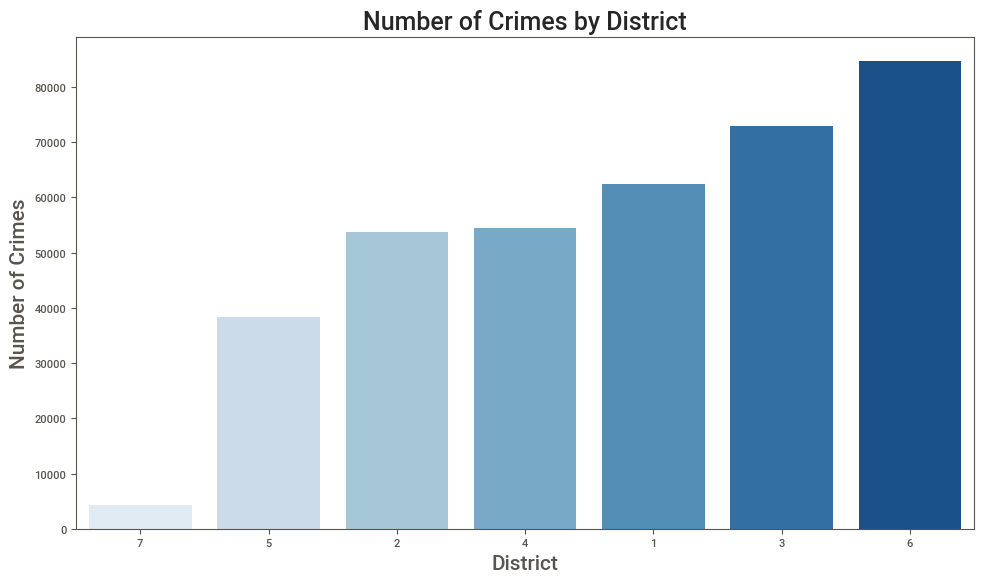

In [15]:
# plot it
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='District', 
            y='Number of Crimes', 
            data=n_crimes_per_district, 
            palette = 'Blues', 
            order=n_crimes_per_district.sort_values('Number of Crimes').District
           )
# set labels
plt.xlabel("District", size=15)
plt.ylabel("Number of Crimes", size=15)
plt.title("Number of Crimes by District", size=18)
plt.tight_layout()
plt.savefig(r"E:\Regis\Practicum_2\number_of_crimes_by_district.png", dpi=100)


The plot show the districts ordered from least to most crimes.  
District 6 has the most crimes with 84,753.  District 7 has the least crimes at 4,348.

#### Get count of crimes in each neighborhood

In [16]:
n_crimes_per_neighborhood = pd.DataFrame(df.neighborhood.value_counts())
n_crimes_per_neighborhood.rename(columns={'neighborhood': 'Number of Crimes'}, inplace=True)
n_crimes_per_neighborhood['Neighborhood'] = n_crimes_per_neighborhood.index
n_crimes_per_neighborhood = n_crimes_per_neighborhood.reset_index(drop=True)
n_crimes_per_neighborhood.sort_values(by=['Number of Crimes'], ascending=True, inplace=True)

In [17]:
n_crimes_per_neighborhood

,Number of Crimes,Neighborhood
77,443,wellshire
76,475,indian creek
75,747,country club
74,1126,rosedale
73,1409,skyland
...,...,...
4,13505,montbello
3,14150,capitol hill
2,14831,stapleton
1,15189,cbd


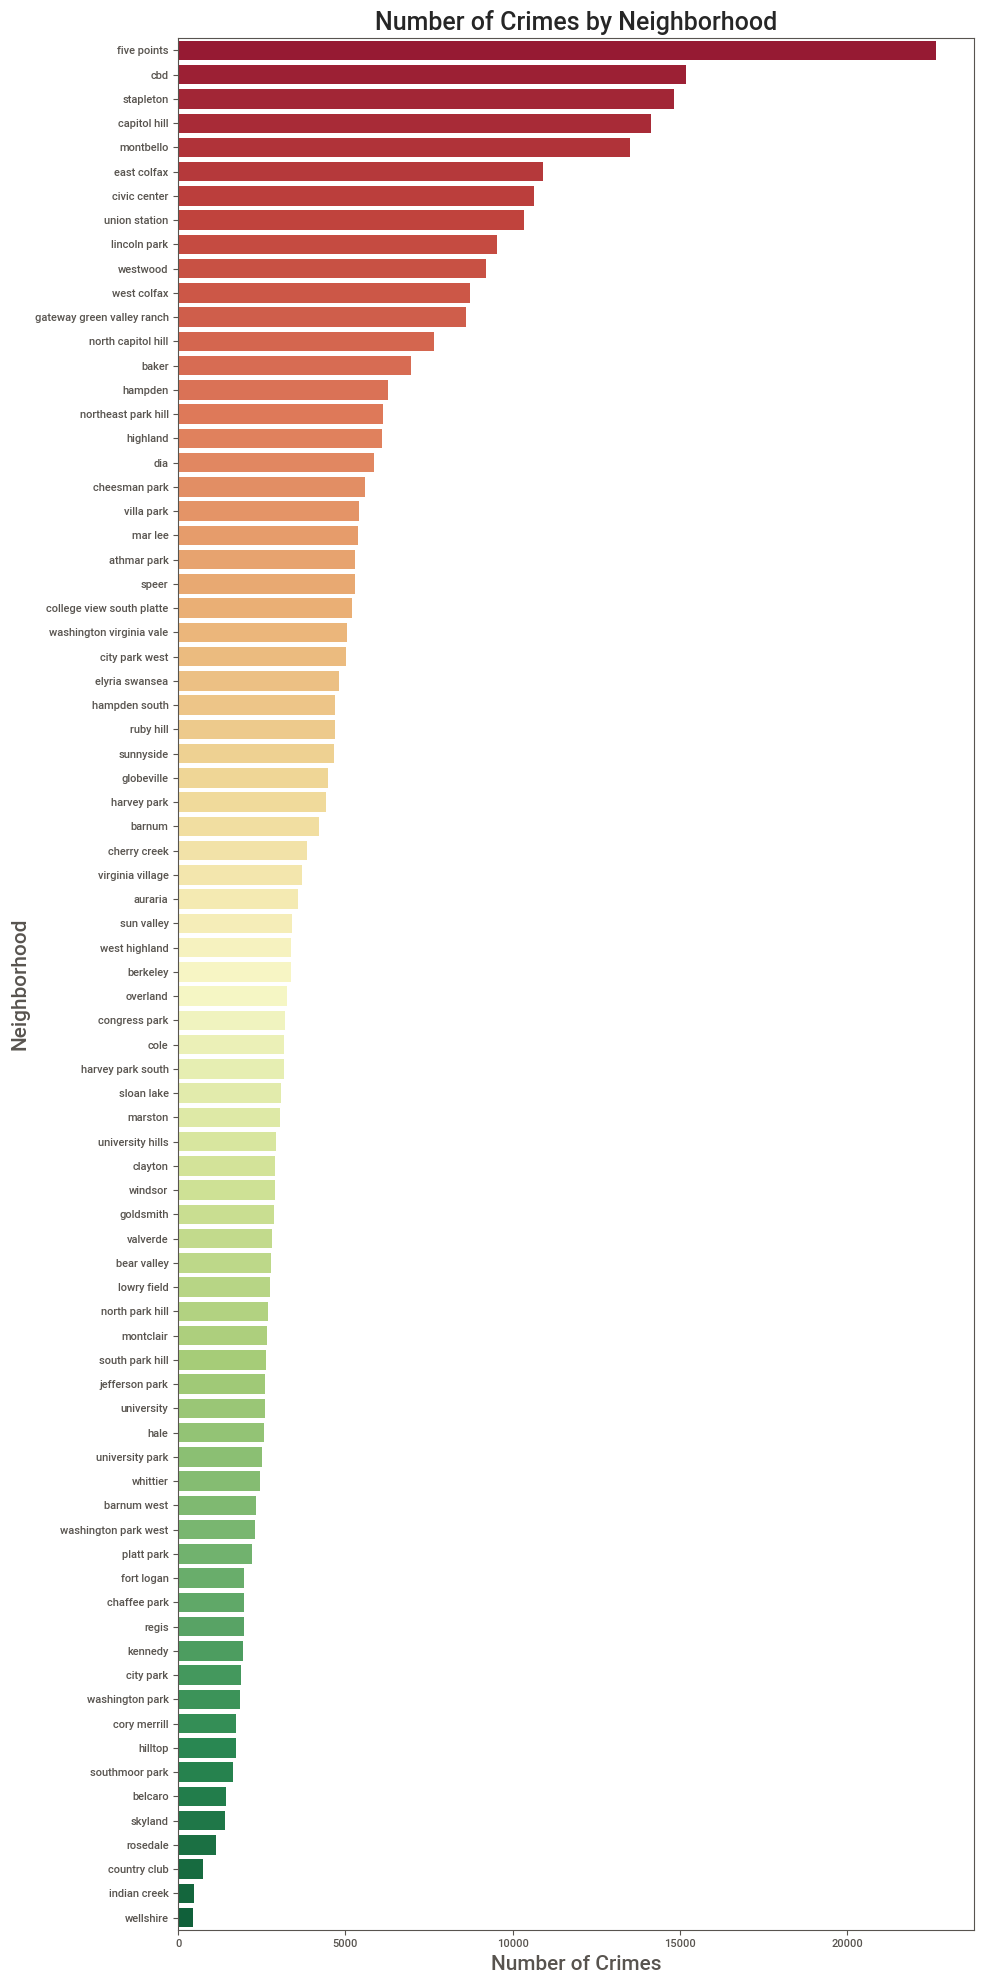

In [18]:
# plot it
plt.figure(figsize=(10,20))
# make barplot and sort bars
sns.barplot(x='Number of Crimes', 
            y='Neighborhood', 
            data=n_crimes_per_neighborhood, 
            palette = 'RdYlGn', 
            order=n_crimes_per_neighborhood.sort_values('Number of Crimes', ascending=False).Neighborhood,
            orient='h'
           )
# set labels
plt.xlabel("Number of Crimes", size=15)
plt.ylabel("Neighborhood", size=15)
plt.title("Number of Crimes by Neighborhood", size=18)
plt.tight_layout()
#plt.xscale('log',nonposx='clip')
plt.savefig(r"E:\Regis\Practicum_2\number_of_crimes_by_neighborhood.png", dpi=100)


The neighborhood with the most crimes by far is Five Points with 22,663 crimes.  The neighborhoods of the Central Business District, Stapleton, Capital Hill and Montbello form the next cluster of crime incidence and round out the top five neighborhoods for crime.

In [19]:
# x = n_crimes_per_neighborhood.pivot(values="Neighborhood", columns="Number of Crimes")
# sns.heatmap(x)

#### Frequency of each crime category


In [20]:
# get count of crimes by type
n_each_crime = pd.DataFrame(df.offense_category_id.value_counts())
n_each_crime.rename(columns={'offense_category_id': 'Count'}, inplace=True)
n_each_crime['Crime_Category'] = n_each_crime.index
n_each_crime = n_each_crime.reset_index(drop=True)
n_each_crime.sort_values(by=['Count'], ascending=True, inplace=True)

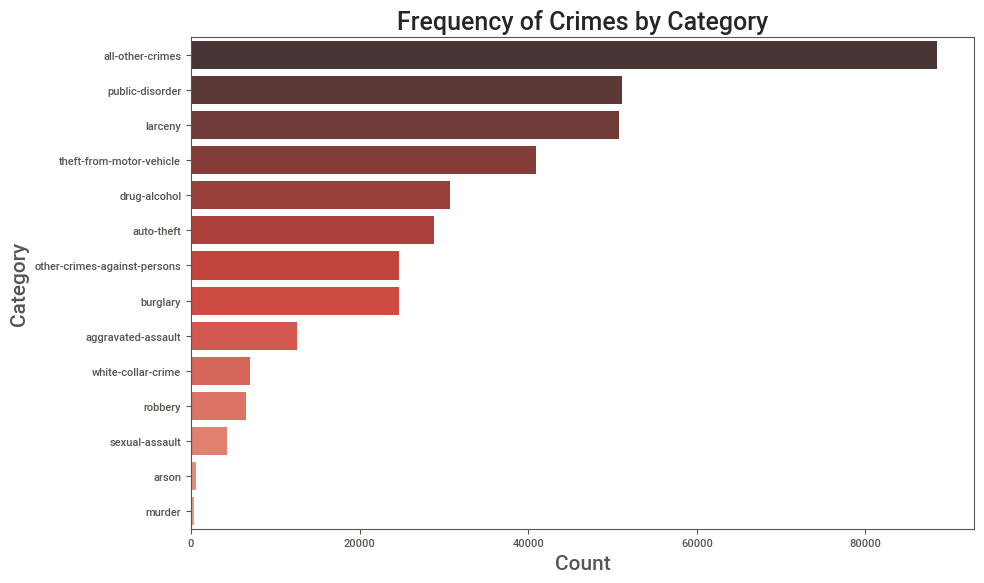

In [21]:
# plot it
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='Count', 
            y='Crime_Category', 
            data=n_each_crime, 
            palette = 'Reds_d', 
            order=n_each_crime.sort_values('Count', ascending=False).Crime_Category,
            orient='h'
           )
# set labels
plt.xlabel("Count", size=15)
plt.ylabel("Category", size=15)
plt.title("Frequency of Crimes by Category", size=18)
plt.tight_layout()
#plt.xscale('log',nonposx='clip')
plt.savefig(r"E:\Regis\Practicum_2\crime_frequency.png", dpi=100)


In [22]:
n_each_crime

,Count,Crime_Category
13,316,murder
12,625,arson
11,4307,sexual-assault
10,6477,robbery
9,6959,white-collar-crime
8,12593,aggravated-assault
7,24637,burglary
6,24654,other-crimes-against-persons
5,28813,auto-theft
4,30678,drug-alcohol


The highest category of crimes is a catch-all category, "all other crimes".  Unfortunately, the Denver Police Department does not provide a breakdown of this category making it difficult to extract any meaningful information.  
  
The second and thrid highest categories are a near tie at around 51,000 incidneces are "public disorder" and "larceny", respectively.  Theft from vehicles and drug and alcohol offenses round out the top five.


#### Frequency of crime types in top crime neighborhood (Five Points)

In [23]:
n_five_points = df[df['neighborhood'] == 'five points']
n_five_points = pd.DataFrame(n_five_points.offense_category_id.value_counts())
n_five_points.rename(columns={'offense_category_id': 'Count'}, inplace=True)
n_five_points['Crime_Category'] = n_five_points.index
n_five_points = n_five_points.reset_index(drop=True)
n_five_points.sort_values(by=['Count'], ascending=True, inplace=True)
n_five_points

,Count,Crime_Category
13,22,murder
12,32,arson
11,225,white-collar-crime
10,308,sexual-assault
9,431,robbery
8,1034,burglary
7,1045,aggravated-assault
6,1070,auto-theft
5,1894,other-crimes-against-persons
4,2371,theft-from-motor-vehicle


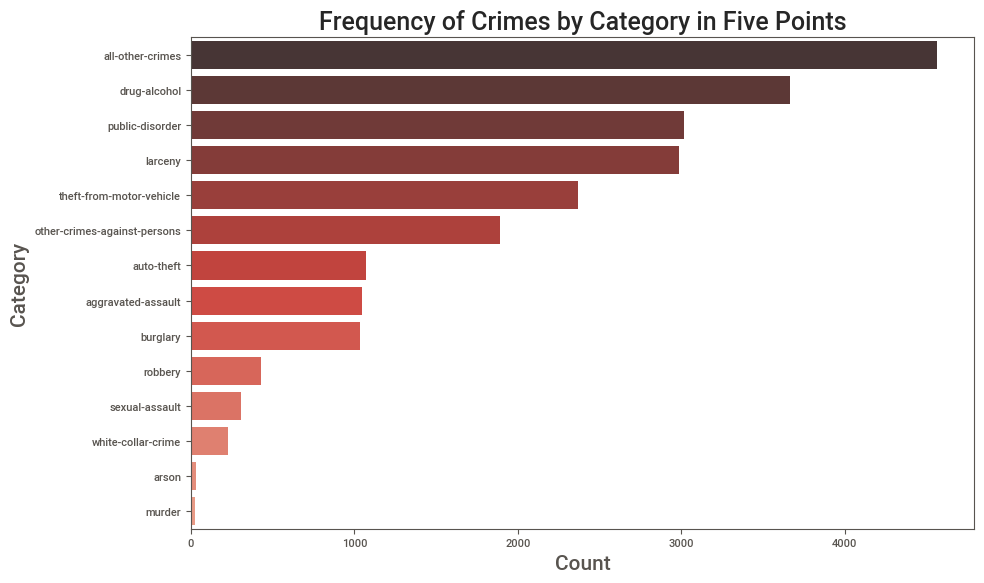

In [24]:
# plot it
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='Count', 
            y='Crime_Category', 
            data=n_five_points, 
            palette = 'Reds_d', 
            order=n_five_points.sort_values('Count', ascending=False).Crime_Category,
            orient='h'
           )
# set labels
plt.xlabel("Count", size=15)
plt.ylabel("Category", size=15)
plt.title("Frequency of Crimes by Category in Five Points", size=18)
plt.tight_layout()
#plt.xscale('log',nonposx='clip')
plt.savefig(r"E:\Regis\Practicum_2\crime_frequency_five_points.png", dpi=100)


The pattern of crime category in Five Points is similar to the larger trend city wide.  "All Other Crimes" are the top category followed, in this case, by drug and alcohol crimes.  This is different than the city wide trend where drug and alcohol related crimes are the fifth most frequent type.

### Time Series Analysis

In [25]:
# copy dataframe setting reported date as the index
df_time = df.copy(deep=True)

df_time['date'] = pd.to_datetime(df_time.reported_date).dt.date

df_time = df_time.set_index('reported_date')

# add year, month, day columns
df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Day'] = df_time.index.day
df_time['Hour'] = df_time.index.hour
df_time['Minute'] = df_time.index.minute

df_time.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,incident_address,geo_x,...,geo_lat,district_id,precinct_id,neighborhood,date,Year,Month,Day,Hour,Minute
reported_date,,,,,,,,,,,,,,,,,,,,,
2018-12-27 16:51:00,2.018870e+09,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaT,2681 N HANOVER CT,3178210.0,...,39.755561,5,512,stapleton,2018-12-27,2018,12,27,16,51
2017-06-12 08:44:00,2.017601e+10,20176005213239900,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,2017-06-08 17:15:00,1705 17TH ST,3140790.0,...,39.753669,6,612,union station,2017-06-12,2017,6,12,8,44
2019-12-09 13:35:00,2.019601e+10,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,2019-12-07 18:30:00,1350 N IRVING ST,3132400.0,...,39.738134,1,122,west colfax,2019-12-09,2019,12,9,13,35
2018-12-22 22:00:00,2.018862e+09,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,2018-12-22 20:31:00,13625 E RANDOLPH PL,3188580.0,...,39.797750,5,521,montbello,2018-12-22,2018,12,22,22,0
2018-04-20 13:33:00,2.018264e+09,2018264446131600,1316,0,threats-to-injure,public-disorder,2018-03-29 10:00:00,2018-04-17 10:00:00,1865 LARIMER ST,3142086.0,...,39.751731,6,612,union station,2018-04-20,2018,4,20,13,33


In [26]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371189 entries, 2018-12-27 16:51:00 to 2020-06-11 22:35:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371189 non-null  float64       
 1   offense_id              371189 non-null  int64         
 2   offense_code            371189 non-null  int64         
 3   offense_code_extension  371189 non-null  int64         
 4   offense_type_id         371189 non-null  object        
 5   offense_category_id     371189 non-null  object        
 6   first_occurrence_date   371189 non-null  datetime64[ns]
 7   last_occurrence_date    159918 non-null  datetime64[ns]
 8   incident_address        339092 non-null  object        
 9   geo_x                   366882 non-null  float64       
 10  geo_y                   366882 non-null  float64       
 11  geo_lon                 371189 non-null  float64       
 

In [27]:
df_time['date'] = pd.to_datetime(df_time['date'])

In [28]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371189 entries, 2018-12-27 16:51:00 to 2020-06-11 22:35:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371189 non-null  float64       
 1   offense_id              371189 non-null  int64         
 2   offense_code            371189 non-null  int64         
 3   offense_code_extension  371189 non-null  int64         
 4   offense_type_id         371189 non-null  object        
 5   offense_category_id     371189 non-null  object        
 6   first_occurrence_date   371189 non-null  datetime64[ns]
 7   last_occurrence_date    159918 non-null  datetime64[ns]
 8   incident_address        339092 non-null  object        
 9   geo_x                   366882 non-null  float64       
 10  geo_y                   366882 non-null  float64       
 11  geo_lon                 371189 non-null  float64       
 

In [29]:
# get count of number of crimes by year and month
monthly = df_time['date'].groupby(df_time.date.dt.to_period("M")).count()
weekly = df_time['date'].groupby(df_time.date.dt.to_period("W")).count()
daily = df_time['date'].groupby(df_time.date.dt.to_period("D")).count()

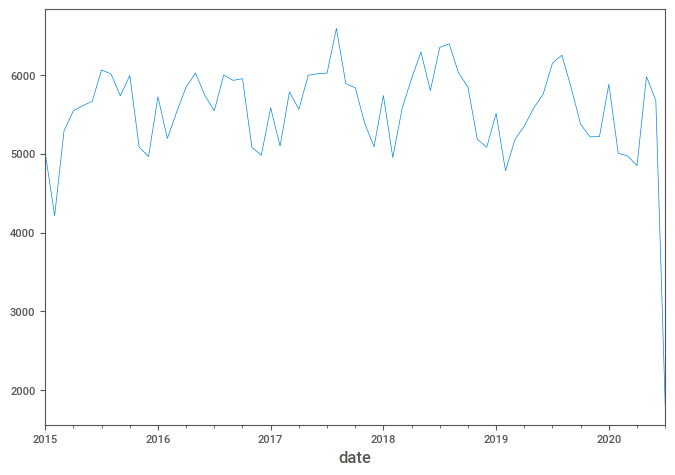

In [30]:
# visualize time series
monthly.plot(linewidth=0.5);
#weekly.plot(linewidth=0.5);
#daily.plot(linewidth=0.5);

The plot of crime frequency by month shows a seasonal trend in the occurrence of crime.  The winter months have a lower incidence of crime while the summer months show a significant rise in crime.  Summer 2017 was a high-point for crime in Denver.  

#### Car Thefts by Neighborhood and by Month

In [31]:
# pick a crime category and see how many by month
car_theft_df = df_time[df_time.offense_type_id.str.contains('auto-theft')]
car_theft_df.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,incident_address,geo_x,...,geo_lat,district_id,precinct_id,neighborhood,date,Year,Month,Day,Hour,Minute
reported_date,,,,,,,,,,,,,,,,,,,,,
2016-02-05 17:59:00,2.016760e+08,201675955220401,2204,1,burg-auto-theft-resd-no-force,burglary,2016-01-31 14:00:00,2016-02-05 07:30:00,665 S CLINTON ST,3175326.0,...,39.703175,3,321,windsor,2016-02-05,2016,2,5,17,59
2019-10-13 22:17:00,2.019656e+09,2019656399220400,2204,1,burg-auto-theft-resd-no-force,burglary,2019-10-13 02:30:00,2019-10-13 19:00:00,530 E 20TH AVE,3146048.0,...,39.746665,6,621,north capitol hill,2019-10-13,2019,10,13,22,17
2015-03-08 10:44:00,2.015129e+09,2015128757220300,2203,1,burg-auto-theft-busn-w-force,burglary,2015-03-08 06:00:00,2015-03-08 07:30:00,4397 W FLORIDA AVE,3128351.0,...,39.689669,4,421,mar lee,2015-03-08,2015,3,8,10,44
2020-02-05 20:58:00,2.020801e+08,202080139220401,2204,1,burg-auto-theft-resd-no-force,burglary,2020-02-04 22:00:00,2020-02-05 05:00:00,1685 N COLORADO BLVD,3157176.0,...,39.743425,2,213,city park,2020-02-05,2020,2,5,20,58
2015-06-20 11:07:00,2.015343e+09,2015342996220400,2204,1,burg-auto-theft-resd-no-force,burglary,2015-06-20 01:00:00,2015-06-20 09:00:00,1828 S MARION ST,3148625.0,...,39.683388,3,313,university,2015-06-20,2015,6,20,11,7


In [32]:
# Car theft by neighborhood
car_theft_df.groupby('neighborhood').size().sort_values(ascending = False)


neighborhood
stapleton                     43
gateway green valley ranch    40
five points                   32
hampden                       27
montbello                     24
                              ..
city park                      2
indian creek                   2
harvey park                    1
auraria                        1
cbd                            1
Length: 78, dtype: int64

In [33]:
top_20_car_theft_hoods = car_theft_df.groupby('neighborhood').size().sort_values(ascending = True).tail(20)

#### Top 20 Car Theft Neighborhoods

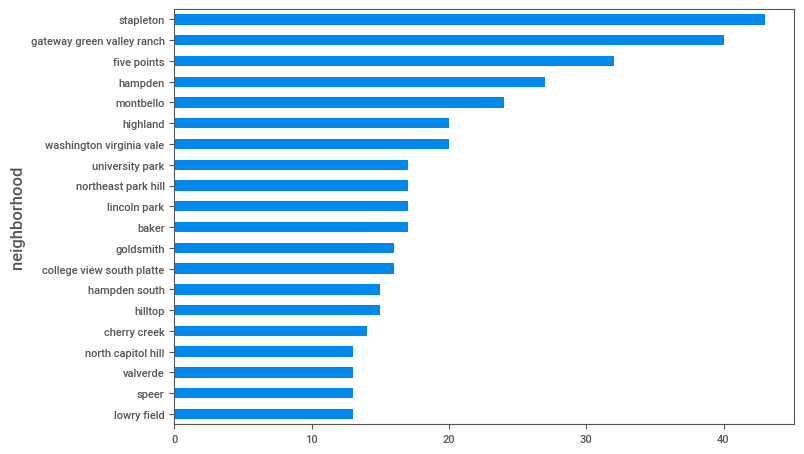

In [34]:
top_20_car_theft_hoods.plot(kind='barh')


The number one neighborhood for car thefts is Stapleton, followed closely by Gateway/Green Valley Ranch. The lowest occurence of car thefts is in the Central Business District, Speer, Valverde, and North Capitl Hill neighborhoods.

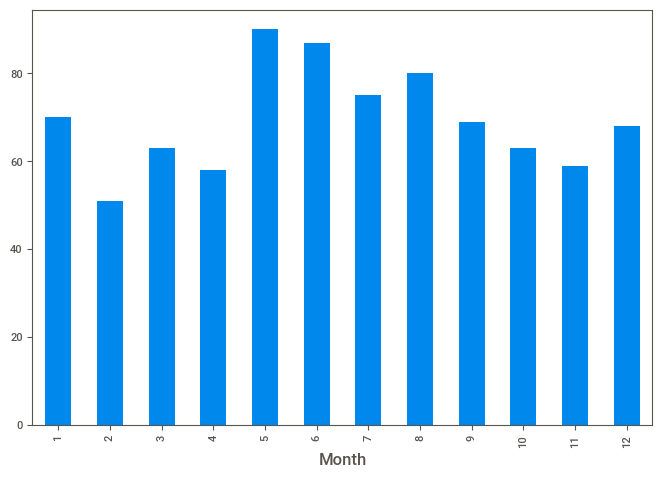

In [35]:
car_theft_df.groupby(['Month']).size().plot(kind='bar')

The months of May and June are the highest in terms of car thefts.  February has the lowest incidence of car thefts.

## Geographical Visualization 
The crime data from the Denver Police Department contains a number of location-based features.  I will use the latitude and longitude location of reported crimes for geographic analysis.

The data for neighborhoods, shapefiles, etc. can be found here:  
https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-statistical-neighborhoods

A zipped 
of the shapefile was downloaded from the above site and converted to a geojson file format by following the directions here:  https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

Denver's location: 
lat:  39.7348
lon: -104.9653
  
    
The general steps for this portion of the analysis are from a study on crime in San Francisco found here: https://thecleverprogrammer.com/2020/05/26/san-francisco-crime-analysis-with-data-science/

In [36]:
# Read in neighborhood data
n_df = pd.read_csv("neighborhoods.csv", header=None)
#n_df.rename(index={1:"neighborhood"}, inplace=True)
#neighborhoods = n_df.neighborhood.unique()

In [37]:
# Rename the column and find all the unique neighborhood names
n_df.columns = ["neighborhoods"]
neighborhoods = n_df.neighborhoods.unique()

In [38]:
neighborhoods

array(['Hampden', 'Baker', 'Washington Park', 'Cherry Creek',
       'Country Club', 'Clayton', 'Skyland', 'City Park West',
       'Capitol Hill', 'North Capitol Hill', 'Civic Center', 'CBD',
       'Union Station', 'Five Points', 'Stapleton', 'Highland',
       'Globeville', 'University Park', 'Cory - Merrill',
       'Washington Park West', 'Speer', 'Congress Park', 'Cole',
       'Sunnyside', 'Ruby Hill', 'University', 'Goldsmith',
       'Virginia Village', 'DIA', 'University Hills', 'West Colfax',
       'West Highland', 'Southmoor Park', 'Indian Creek', 'East Colfax',
       'Rosedale', 'City Park', 'Lowry Field', 'Harvey Park South',
       'Gateway / Green Valley Ranch', 'Barnum West', 'Montclair',
       'Platt Park', 'Mar Lee', 'Westwood', 'Washington Virginia Vale',
       'Villa Park', 'Hale', 'North Park Hill', 'South Park Hill',
       'Kennedy', 'College View / South Platte', 'Hampden South',
       'Northeast Park Hill', 'Elyria Swansea', 'Overland',
       'Cheesman P

#### Create a dataframe of the frequency of crime by neighborhood

In [39]:
# n_df = pd.read_csv("neighborhoods.csv", names = "neighborhood", header=None)
# #n_df.rename(index={1:"neighborhood"}, inplace=True)
# neighborhoods = n_df.neighborhood.unique()
 

t = df.neighborhood.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
#table = table.reindex(neighborhoods)

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table 

,Neighborhood,Count
0,five points,22663
1,cbd,15189
2,stapleton,14831
3,capitol hill,14150
4,montbello,13505
...,...,...
73,skyland,1409
74,rosedale,1126
75,country club,747
76,indian creek,475


#### Change the capitalization of names to match data 
The .title() method is used to capitalize all words in the name.

In [40]:
# This worked before but now errors with "map object not callable"
table['Neighborhood'] = list( map(lambda x: x.title(), table['Neighborhood']))
table.Neighborhood.unique()

array(['Five Points', 'Cbd', 'Stapleton', 'Capitol Hill', 'Montbello',
       'East Colfax', 'Civic Center', 'Union Station', 'Lincoln Park',
       'Westwood', 'West Colfax', 'Gateway Green Valley Ranch',
       'North Capitol Hill', 'Baker', 'Hampden', 'Northeast Park Hill',
       'Highland', 'Dia', 'Cheesman Park', 'Villa Park', 'Mar Lee',
       'Athmar Park', 'Speer', 'College View South Platte',
       'Washington Virginia Vale', 'City Park West', 'Elyria Swansea',
       'Hampden South', 'Ruby Hill', 'Sunnyside', 'Globeville',
       'Harvey Park', 'Barnum', 'Cherry Creek', 'Virginia Village',
       'Auraria', 'Sun Valley', 'West Highland', 'Berkeley', 'Overland',
       'Congress Park', 'Cole', 'Harvey Park South', 'Sloan Lake',
       'Marston', 'University Hills', 'Clayton', 'Windsor', 'Goldsmith',
       'Valverde', 'Bear Valley', 'Lowry Field', 'North Park Hill',
       'Montclair', 'South Park Hill', 'Jefferson Park', 'University',
       'Hale', 'University Park', 'Whit

In [41]:
# s = map(lambda x: x.title(), table['Neighborhood'])
# # table['Neighborhood'] =
# table.Neighborhood.unique()

#### Reformat problem names
Several of the names contain hyphens or are abbreviations with irregular capitalization .

In [42]:
table.Neighborhood.replace(to_replace='Gateway Green Valley Ranch', value='Gateway - Green Valley Ranch', inplace=True )
table.Neighborhood.replace(to_replace='College View South Platte', value='College View - South Platte', inplace=True )
table.Neighborhood.replace(to_replace='Cory Merrill', value='Cory - Merrill', inplace=True )
table.Neighborhood.replace(to_replace='Dia', value='DIA', inplace=True )
table.Neighborhood.replace(to_replace='Cbd', value='CBD', inplace=True )

In [43]:
table.Neighborhood.unique()

array(['Five Points', 'CBD', 'Stapleton', 'Capitol Hill', 'Montbello',
       'East Colfax', 'Civic Center', 'Union Station', 'Lincoln Park',
       'Westwood', 'West Colfax', 'Gateway - Green Valley Ranch',
       'North Capitol Hill', 'Baker', 'Hampden', 'Northeast Park Hill',
       'Highland', 'DIA', 'Cheesman Park', 'Villa Park', 'Mar Lee',
       'Athmar Park', 'Speer', 'College View - South Platte',
       'Washington Virginia Vale', 'City Park West', 'Elyria Swansea',
       'Hampden South', 'Ruby Hill', 'Sunnyside', 'Globeville',
       'Harvey Park', 'Barnum', 'Cherry Creek', 'Virginia Village',
       'Auraria', 'Sun Valley', 'West Highland', 'Berkeley', 'Overland',
       'Congress Park', 'Cole', 'Harvey Park South', 'Sloan Lake',
       'Marston', 'University Hills', 'Clayton', 'Windsor', 'Goldsmith',
       'Valverde', 'Bear Valley', 'Lowry Field', 'North Park Hill',
       'Montclair', 'South Park Hill', 'Jefferson Park', 'University',
       'Hale', 'University Park', '

In [44]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  78 non-null     object
 1   Count         78 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


#### Crime Maps
Maps of the crime reports will be created using the folium library.  

In [45]:
#Import folium, set the city center location, import geojson data for the neighborhoods, create the map object
from folium.plugins import MarkerCluster
den_lat_lon = [39.7348, -104.9653]
gjson = r'E:\Regis\Practicum_2\denver_neighborhoods.geojson'
den_map = folium.Map(location = den_lat_lon, zoom_start = 10)


#### Chloropleth Map of Crime by Neighborhood


In [46]:
#generate map 1
den_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.Neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    highlight=True,
    legend_name='Crime Rate in Denver',
    tiles='Mapbox Bright',
    reset=True,
    #style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['Neighbourhood', 'Count'],
        aliases=['Neighbourhood', 'Count'],
        localize=True)
)
folium.LayerControl().add_to(den_map)


den_map



C:\Users\cr117\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### Map of Crime Reports
This map is of 1000 reports from the database.  Each report is displayed with a marker indicating the location of the crime.  Selecting the marker displays additional information from the report.  
  
Geographic data for each Denver neighborhood is imported in a geojson formatted file.  This data contains the geometry of each neighborhood for mapping purposes.    
The geopandas library is used to handle the geodata during the process.  

In [49]:
import geopandas as gpd

In [50]:
nbh_geo_df = gpd.read_file(r'E:\Regis\Practicum_2\denver_neighborhoods.geojson', driver='GeoJSON')
nbh_geo_df = nbh_geo_df[['NBHD_ID', 'Neighborhood', 'geometry']] # rename columns

In [51]:
nbh_geo_df.head()

,NBHD_ID,Neighborhood,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


In [52]:
nbh_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   NBHD_ID       78 non-null     int64   
 1   Neighborhood  78 non-null     object  
 2   geometry      78 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.0+ KB


The earlier dataframe containing crime frequency by neighborhood is merged with the geodata.

In [53]:
nbh_geo_count_df = pd.merge(table,nbh_geo_df, on='Neighborhood')

In [54]:
nbh_geo_count_df.head()

,Neighborhood,Count,NBHD_ID,geometry
0,Five Points,22663,26,"POLYGON ((-104.97192 39.77030, -104.97335 39.7..."
1,CBD,15189,10,"POLYGON ((-104.98740 39.74736, -104.98740 39.7..."
2,Stapleton,14831,60,"POLYGON ((-104.86604 39.79841, -104.86604 39.7..."
3,Capitol Hill,14150,9,"POLYGON ((-104.97341 39.74003, -104.97299 39.7..."
4,Montbello,13505,45,"POLYGON ((-104.80990 39.77283, -104.81925 39.7..."


In [55]:
nbh_geo_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  78 non-null     object  
 1   Count         78 non-null     int64   
 2   NBHD_ID       78 non-null     int64   
 3   geometry      78 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 3.0+ KB


In [58]:
# for speed purposes, select the first 1000 records
MAX_RECORDS = 1000
  
# create empty map zoomed in on Denver
map = folium.Map(location=den_lat_lon, zoom_start=10)
 
# add a marker for every record in the filtered data
#for each in df[0:MAX_RECORDS].iterrows():
for i in range(0,1000):  #len(df)):
    folium.Marker(
        location = [df.iloc[i]['geo_lat'],df.iloc[i]['geo_lon']], 
        popup=df.iloc[i][['neighborhood', 'reported_date', 'offense_category_id']]).add_to(map)
  
display(map)
map.save("denver_crime_map_markers_first_1000.html")